In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Generate fake data

In [95]:
df = []
for i in range(50):
    # 
    x1 = np.concatenate([np.linspace(-1, 0, num=20), np.linspace(0.5, 1, num=10)])
    y = -x1 - x1 ** 2 + 2 * x1 ** 3
    x2 = x1 > 0 - (np.random.rand(len(x1)) > 0.8)
    y += x2 * 0.2
    x3 = np.repeat(i, len(x1))
    y += (np.random.rand() / 3)
    y *= (1 + np.random.normal() / 10)
    y += np.random.normal(size=(len(x1))) / 10
    x4 = np.random.normal(size=len(x1))
    df.append(pd.DataFrame({'y': y.astype('float32'), 
                            'x1': x1.astype('float32'),
                            'x2': x2.astype('float32'),
                            'x3': x3.astype('int'), 
                            'x4': x4.astype('float32')}))
df = pd.concat(df, axis=0)

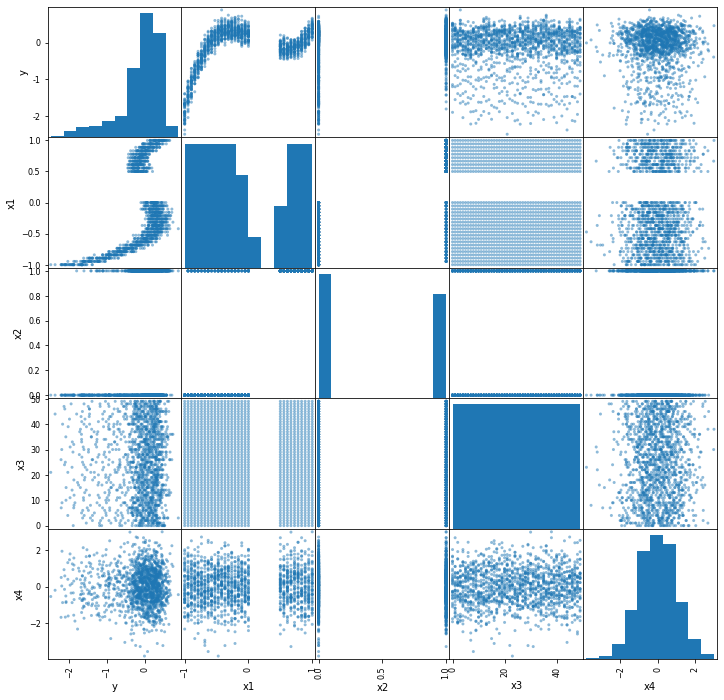

In [96]:
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

### Output to Pickle

In [97]:
split = np.random.uniform(size=len(df)) > 0.9

In [98]:
!mkdir -p ./data

In [99]:
df[~split].to_pickle('./data/simple_train.pkl')
df[split].to_pickle('./data/simple_test.pkl')